In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step1: Load Data 

In [2]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col=['Month'])

In [3]:
df.shape

(144, 1)

In [5]:
df = df.Passengers
df

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<AxesSubplot:xlabel='Month'>

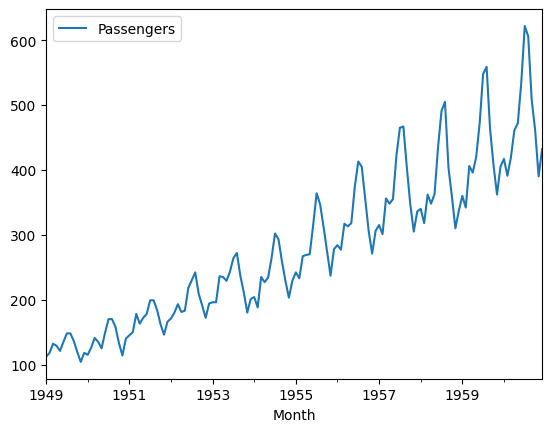

In [4]:
df.plot()

#### Data has trend, seasonality and non stationarity

In [5]:
import statsmodels.api as sm

In [6]:
decomposition = sm.tsa.seasonal_decompose(df)

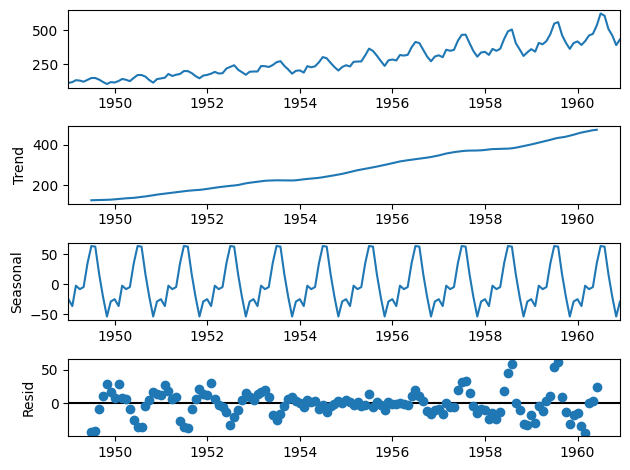

In [7]:
fig = decomposition.plot()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
ts = df.values.reshape(144)

In [10]:
adftest = adfuller(ts)

In [11]:
adftest[1]

0.9918802434376409

In [13]:
train_data = df[:120]
test_data= df[120:]

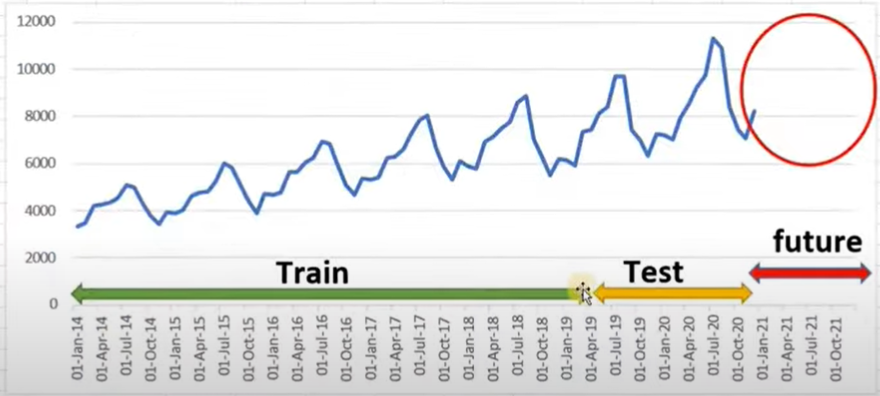

## ARIMA Model Building

#### Arima model has three components 
- 1. AR
- 2. MA
- 3. Integerated

For building ARIMA model we need the 
- AR order p
- MA order q
- Integerated order d

### Hyperparameters of ARIMA model (p,d,q)

In [14]:
# p=7, d=0,q=1

In [15]:
# How to get pdq, 3 different methods discussed below

## Build AIRMA model

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
model = sm.tsa.arima.ARIMA(train_data, order=(7,0,1)).fit()

e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Preddict on Test Data

In [37]:
len(train_data),len(df)-1

(120, 143)

In [38]:
pred = model.predict(start=len(train_data),end=(len(df)-1))

## Model EVALUATION

In [39]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred,test_data))

123.23121977892333

In [40]:
test_data.mean(), np.sqrt(test_data.var())

(Passengers    452.25
 dtype: float64,
 Passengers    76.283368
 dtype: float64)

<AxesSubplot:xlabel='Month'>

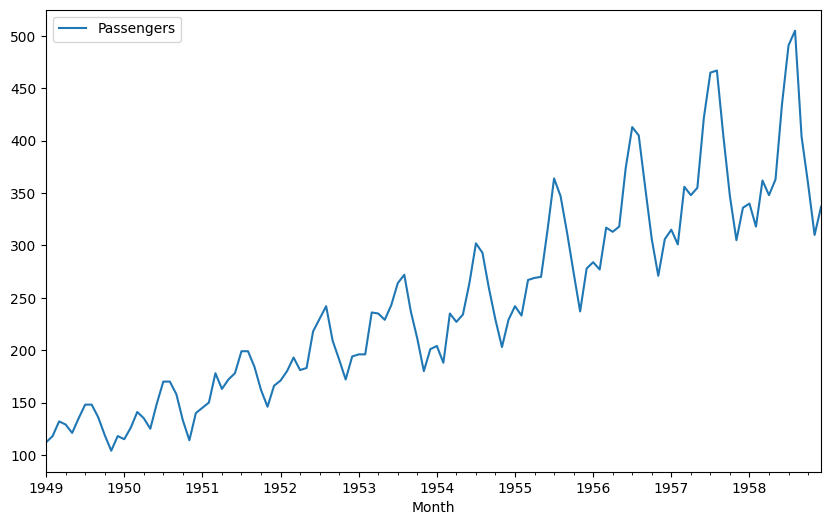

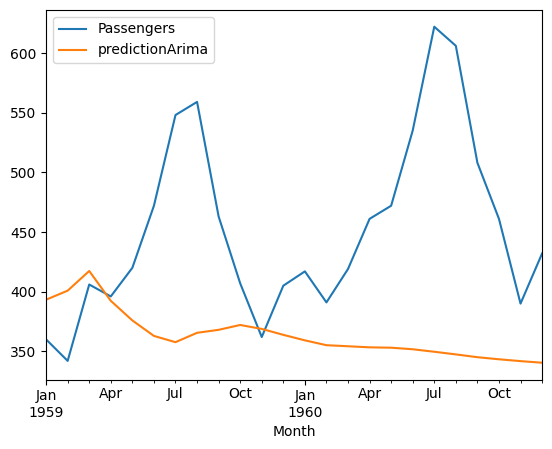

In [41]:
train_data.plot(legend=True, label='Train',figsize=(10,6))
test_data.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionArima')

# Final Model

In [42]:
len(df),len(df)+6

(144, 150)

e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\python\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

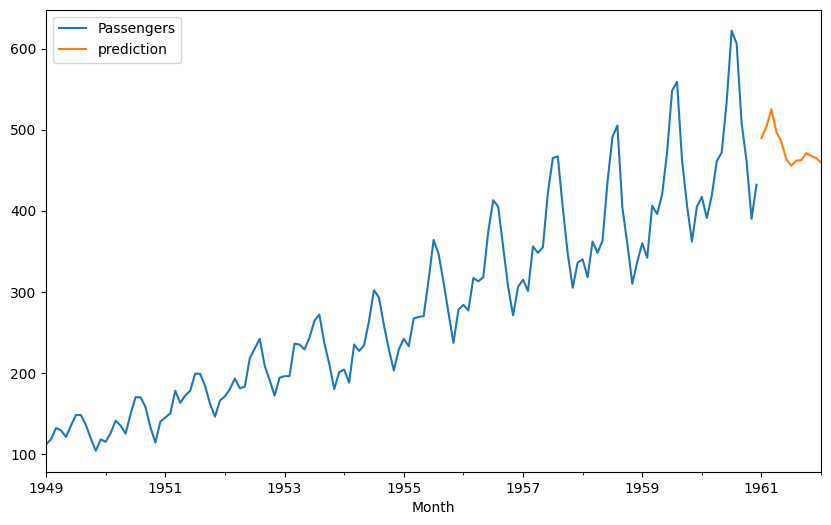

In [44]:
finalmodel = sm.tsa.arima.ARIMA(df,order=(7,0,1)).fit()
prediction=finalmodel.predict(len(df),len(df)+12)
df.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True, label='prediction')

#### How to get ARIMA Hyperparameters pdq 

In [45]:
import itertools

In [46]:
p=range(0,8)
d=range(0,8)
q= range(0,2)

In [47]:
pdq_combinations  = list(itertools.product(p,d,q))

In [48]:
len(pdq_combinations)

128

In [49]:
rmse=[]
order1 = []

In [37]:
for pdq in pdq_combinations:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred = model.predict(start=len(train),end=len(ts)-1)
        error = np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS w

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [50]:
result = pd.DataFrame(index=order1,data=rmse,columns=['rmse'])

In [88]:
result.rmse.sort_values()

(7, 0, 1)     95.743168
(6, 0, 1)     99.337767
(3, 0, 1)    102.345074
(7, 0, 0)    121.604744
(5, 0, 0)    125.949846
(6, 0, 0)    130.984095
(4, 0, 0)    162.447169
(2, 0, 1)    171.099257
(3, 0, 0)    173.594416
(1, 0, 0)    174.871264
(1, 0, 1)    181.636987
(2, 0, 0)    188.053451
(0, 0, 1)    218.052680
(4, 0, 1)    303.118741
(5, 0, 1)    434.386461
(1, 1, 1)    454.137814
(2, 1, 1)    454.302762
(3, 1, 1)    454.403010
(5, 1, 1)    454.531907
(4, 1, 1)    454.552887
(4, 1, 0)    454.566953
(5, 1, 0)    454.569337
(6, 1, 0)    454.582231
(7, 1, 0)    454.803693
(6, 1, 1)    454.927643
(7, 1, 1)    455.419958
(3, 1, 0)    455.627581
(0, 1, 1)    455.847265
(2, 1, 0)    455.882422
(1, 1, 0)    456.093235
(1, 2, 0)    458.785151
(4, 2, 1)    458.994402
(5, 2, 1)    459.010727
(6, 2, 1)    459.074359
(2, 2, 0)    459.231654
(3, 2, 1)    459.234705
(0, 2, 1)    459.287186
(7, 2, 1)    459.319145
(6, 2, 0)    459.570261
(3, 2, 0)    459.764052
(7, 2, 0)    459.820692
(5, 2, 0)    459